**IMPORT LIBRERIE**

In [91]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
import os
path = "E:/Intenso/02 Data Science - Bicocca/03 II Anno/II Semestre/Industry Lab/19-20/DB Bosch"
df = pd.read_csv(os.path.join(path,"caso2_ALL_ESITI.csv"))

**ESPLORAZIONE DATASET**

In [93]:
df.shape

(296605, 33)

In [94]:
df.dtypes

Banco                                 object
CodiceDaLinea                         object
Programma                             object
Data_ora                              object
Data                                  object
Ora                                   object
Turno                                 object
Master                                object
coppia_max_ciclo                     float64
picco_coppia_zero                    float64
media_coppia_zero                    float64
picco_coppia_iniziale                float64
media_coppia_iniziale                float64
velocita_a_regime                    float64
picco_pressione_velocita_a_regime    float64
media_pressione_velocita_a_regime    float64
picco_portata_velocita_a_regime      float64
media_portata_velocita_a_regime      float64
velicita_1                           float64
picco_pressione_velocita_1           float64
media_pressione_velocita_1           float64
picco_portata_velocita_1             float64
media_port

In [95]:
df.head()

,Banco,CodiceDaLinea,Programma,Data_ora,Data,Ora,Turno,Master,coppia_max_ciclo,picco_coppia_zero,...,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura,n_esito,esito
0,BancoGP5,010160954163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:43:30,09/11/2016,15:43:30,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.204679,0.143800,42.196945,100,PEZZO BUONO ...
1,BancoGP5,010160955163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:45:24,09/11/2016,15:45:24,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.216845,0.118703,42.226974,100,PEZZO BUONO ...
2,BancoGP5,010160957163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:46:15,09/11/2016,15:46:15,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.174554,0.122338,42.201241,100,PEZZO BUONO ...
3,BancoGP5,010160956163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:47:11,09/11/2016,15:47:11,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.145885,0.103383,42.116058,100,PEZZO BUONO ...
4,BancoGP5,010160958163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:48:04,09/11/2016,15:48:04,B,,0.0,0.0,...,500.0,0.0,0.0,0.0,0.0,0.236076,0.149168,42.087067,100,PEZZO BUONO ...


In [96]:
df.describe()

,coppia_max_ciclo,picco_coppia_zero,media_coppia_zero,picco_coppia_iniziale,media_coppia_iniziale,velocita_a_regime,picco_pressione_velocita_a_regime,media_pressione_velocita_a_regime,picco_portata_velocita_a_regime,media_portata_velocita_a_regime,...,media_portata_velocita_1,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura,n_esito
count,296605.000000,296605.0,2.966050e+05,296605.0,296605.0,296605.000000,296605.000000,296605.000000,296605.000000,296605.000000,...,296605.000000,296605.000000,296605.0,296605.0,296605.0,296605.0,296605.000000,296605.000000,296605.000000,296605.000000
mean,0.009250,0.0,4.278898e-03,0.0,0.0,2300.037761,11.510206,11.309670,1303.164422,1298.153754,...,58.500435,499.990560,0.0,0.0,0.0,0.0,0.399962,0.197613,41.187810,100.700754
std,0.212485,0.0,3.649502e-03,0.0,0.0,6.144864,1.831713,1.800797,119.828814,120.075738,...,6.721527,1.943191,0.0,0.0,0.0,0.0,0.179777,0.061749,1.126921,9.808101
min,0.000000,0.0,1.294635e-08,0.0,0.0,2300.000000,0.000000,-0.011547,0.000000,0.000000,...,0.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,37.320004,1.000000
25%,0.000000,0.0,1.710183e-03,0.0,0.0,2300.000000,11.895733,11.679032,1325.647339,1320.957642,...,54.593998,500.000000,0.0,0.0,0.0,0.0,0.280196,0.160603,40.513451,100.000000
50%,0.000000,0.0,3.395009e-03,0.0,0.0,2300.000000,12.352711,12.124415,1350.899902,1346.076538,...,56.879986,500.000000,0.0,0.0,0.0,0.0,0.366345,0.193236,41.131039,100.000000
75%,0.000000,0.0,6.607929e-03,0.0,0.0,2300.000000,12.580805,12.365120,1364.400024,1359.144409,...,60.480015,500.000000,0.0,0.0,0.0,0.0,0.483601,0.229697,41.955624,100.000000
max,7.382427,0.0,4.996369e-02,0.0,0.0,3700.000000,17.255760,16.859419,11700.000000,11649.959961,...,90.000031,500.000000,0.0,0.0,0.0,0.0,5.080070,1.948498,49.100826,273.000000


In [97]:
#Banco uguale per tutti
#CodiceDaLinea uguale per tutti
#Programma variabile ma maggiormente uguale a 18_GP5_910_CW.DBF
#coppia_max_ciclo sostanzialmente sempre 0
#picco_coppia_zero sempre 0
#media_coppia_zero sempre valore molto piccolo
#picco_coppia_iniziale e media_coppia_finale sempre 0
#picco_coppia_finale e media_coppia_finale sostanzialmente sempre significativi [Nm]
#velocita 1 = 140 rpm con valori di pressione [bar] e portata [l/h]
#velocita 2 = 50 o 100 rpm ma non valutabili pressione [bar] e portata [l/h]
#velocita a regime = 2300 rpm con valori di pressione [bar] e portata [l/h]
#n_esito = 100 -> PEZZO BUONO

In [98]:
var_numeric = []
for i in range(len(df.dtypes)):
    if (df.dtypes[i] == 'float64'):
        var_numeric.append(df.columns[i])
len(var_numeric)

23

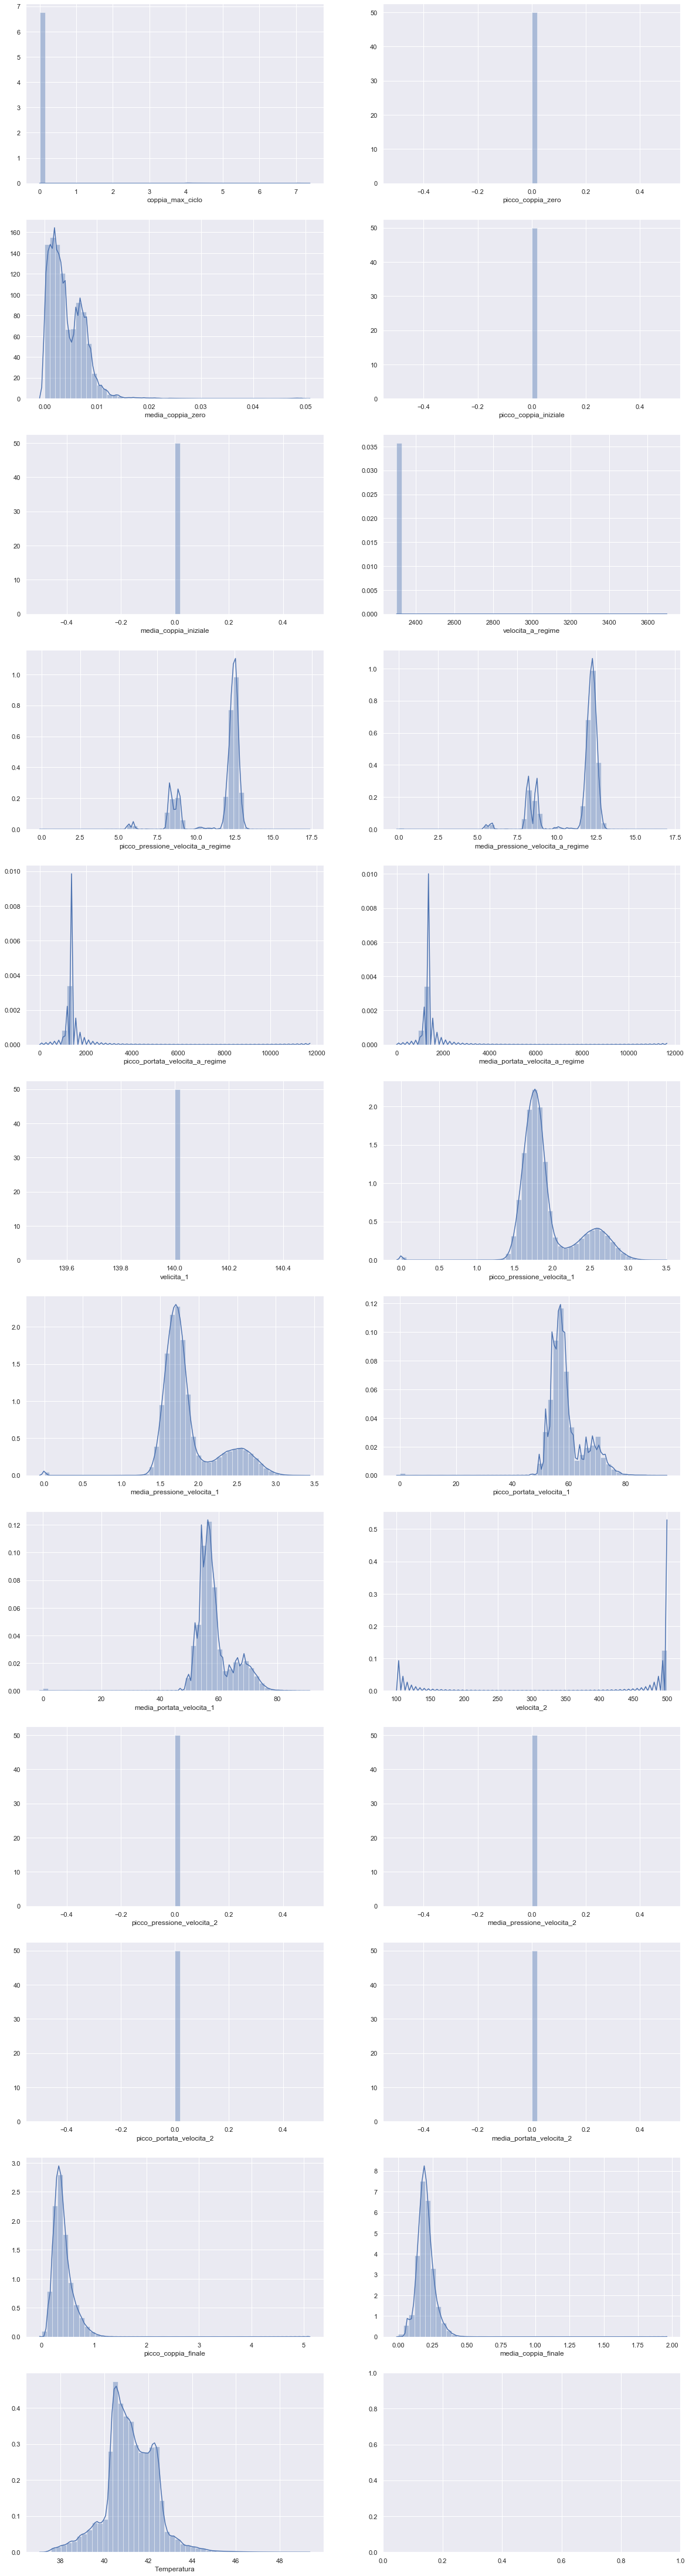

In [99]:
sns.set(color_codes=True)
fig, axes = plt.subplots(figsize=(20,80), nrows=12, ncols=2)
for i, column in enumerate(var_numeric):
    sns.distplot(df[column], ax=axes[i//2, i%2])

**RICERCA E GESTIONE MISSING VALUES**

In [100]:
df.isnull().sum()

Banco                                   0
CodiceDaLinea                        1077
Programma                               0
Data_ora                                0
Data                                    0
Ora                                     0
Turno                                1217
Master                                  0
coppia_max_ciclo                        0
picco_coppia_zero                       0
media_coppia_zero                       0
picco_coppia_iniziale                   0
media_coppia_iniziale                   0
velocita_a_regime                       0
picco_pressione_velocita_a_regime       0
media_pressione_velocita_a_regime       0
picco_portata_velocita_a_regime         0
media_portata_velocita_a_regime         0
velicita_1                              0
picco_pressione_velocita_1              0
media_pressione_velocita_1              0
picco_portata_velocita_1                0
media_portata_velocita_1                0
velocita_2                        

In [101]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=' ')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [102]:
sum(df.isnull().sum())

0

**DATA SCALING : STANDARDIZZAZIONE**

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
train, test = train_test_split(df, test_size=0.3)
train.shape, test.shape

((207623, 33), (88982, 33))

In [104]:
for var in train:
    if var in var_numeric:
        train[var] = scaler.fit_transform(np.array(train[var]).reshape(-1, 1))
        test[var] = scaler.transform(np.array(test[var]).reshape(-1, 1))
df_scaled = pd.concat([train, test])
df_scaled.shape

(296605, 33)

In [105]:
df_scaled.describe()

,coppia_max_ciclo,picco_coppia_zero,media_coppia_zero,picco_coppia_iniziale,media_coppia_iniziale,velocita_a_regime,picco_pressione_velocita_a_regime,media_pressione_velocita_a_regime,picco_portata_velocita_a_regime,media_portata_velocita_a_regime,...,picco_portata_velocita_1,media_portata_velocita_1,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura
count,296605.000000,296605.0,296605.000000,296605.0,296605.0,296605.000000,296605.000000,296605.000000,296605.000000,296605.000000,...,296605.000000,296605.000000,296605.000000,296605.0,296605.0,296605.0,296605.0,296605.000000,296605.000000,296605.000000
mean,-0.000606,0.0,-0.000377,0.0,0.0,-0.001464,-0.001517,-0.001572,-0.001117,-0.001136,...,0.001721,0.001686,0.000098,0.0,0.0,0.0,0.0,0.001014,0.001634,0.000050
std,0.992520,0.0,0.998737,0.0,0.0,0.864927,1.000449,1.000527,1.001429,1.001388,...,1.000447,1.000362,0.989950,0.0,0.0,0.0,0.0,1.000440,0.998510,1.000851
min,-0.043811,0.0,-1.171353,0.0,0.0,-0.006779,-6.288187,-6.291666,-10.891874,-10.827270,...,-8.622613,-8.704906,-203.773404,0.0,0.0,0.0,0.0,-2.224732,-3.193855,-3.435060
25%,-0.043811,0.0,-0.703341,0.0,0.0,-0.006779,0.209051,0.203647,0.186776,0.189040,...,-0.596144,-0.579707,0.004907,0.0,0.0,0.0,0.0,-0.665472,-0.596824,-0.598868
50%,-0.043811,0.0,-0.242265,0.0,0.0,-0.006779,0.458644,0.451103,0.397816,0.398522,...,-0.201399,-0.239485,0.004907,0.0,0.0,0.0,0.0,-0.186059,-0.069139,-0.050371
75%,-0.043811,0.0,0.636994,0.0,0.0,-0.006779,0.583225,0.584839,0.510639,0.507504,...,0.324926,0.296306,0.004907,0.0,0.0,0.0,0.0,0.466456,0.520448,0.681967
max,34.439539,0.0,12.501897,0.0,0.0,197.051690,3.136602,3.081882,86.886926,86.329188,...,5.061859,4.689756,0.004907,0.0,0.0,0.0,0.0,26.045322,28.314280,7.027825


In [106]:
df_scaled.corr()

,coppia_max_ciclo,picco_coppia_zero,media_coppia_zero,picco_coppia_iniziale,media_coppia_iniziale,velocita_a_regime,picco_pressione_velocita_a_regime,media_pressione_velocita_a_regime,picco_portata_velocita_a_regime,media_portata_velocita_a_regime,...,picco_portata_velocita_1,media_portata_velocita_1,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura
coppia_max_ciclo,1.000000,NaN,0.004531,NaN,NaN,-0.000268,-0.254194,-0.254056,-0.436542,-0.433986,...,-0.375257,-0.378869,0.000211,NaN,NaN,NaN,NaN,-0.096846,-0.139310,0.014904
picco_coppia_zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
media_coppia_zero,0.004531,NaN,1.000000,NaN,NaN,-0.003862,-0.045319,-0.052149,-0.043621,-0.046722,...,0.071576,0.068966,0.000572,NaN,NaN,NaN,NaN,-0.106392,-0.059593,-0.074827
picco_coppia_iniziale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
media_coppia_iniziale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
velocita_a_regime,-0.000268,NaN,-0.003862,NaN,NaN,1.000000,0.001521,0.001975,0.001477,0.001431,...,-0.008507,-0.008570,0.000030,NaN,NaN,NaN,NaN,-0.004220,-0.003113,0.003757
picco_pressione_velocita_a_regime,-0.254194,NaN,-0.045319,NaN,NaN,0.001521,1.000000,0.999078,0.925197,0.926258,...,-0.564132,-0.561157,0.007187,NaN,NaN,NaN,NaN,0.094790,0.225921,-0.130593
media_pressione_velocita_a_regime,-0.254056,NaN,-0.052149,NaN,NaN,0.001975,0.999078,1.000000,0.925396,0.926830,...,-0.563588,-0.560363,0.007117,NaN,NaN,NaN,NaN,0.088033,0.213765,-0.134952
picco_portata_velocita_a_regime,-0.436542,NaN,-0.043621,NaN,NaN,0.001477,0.925197,0.925396,1.000000,0.999710,...,-0.377625,-0.373291,0.006147,NaN,NaN,NaN,NaN,0.101852,0.221059,-0.115356
media_portata_velocita_a_regime,-0.433986,NaN,-0.046722,NaN,NaN,0.001431,0.926258,0.926830,0.999710,1.000000,...,-0.381639,-0.377116,0.007449,NaN,NaN,NaN,NaN,0.099093,0.215691,-0.115202


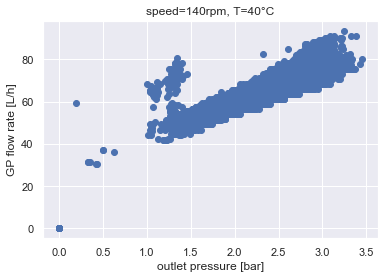

In [107]:
plt.scatter(df.picco_pressione_velocita_1, df.picco_portata_velocita_1)
plt.title("speed=140rpm, T=40°C")
plt.xlabel("outlet pressure [bar]")
plt.ylabel("GP flow rate [L/h]")
plt.show()

#La relazione è positiva cioè all'aumentare della pressione la portata aumenta
#Nel power point invece, regressione test sperimentale relazione negativa
#Ipotizzo quindi che la variabile portata fa riferimento al GP flow rate teorico (???) ma non credo
#La colonna dovrebbe riferirsi al GP flow rate calcolato
#GP flow rate teorico = GP flow rate + alfa * pressione
#Clusterizzo le pompe in diversi gruppi in modo tale che le pompe di ogni gruppo condividono lo stesso leakage coef (range)
#Indago sulla relazione all'interno dei cluster

#velocita_1 = 140 rpm, temperatura intorno ai 40°C, n_esito = 100 (pezzo buono)
#Variabili per clustering: media_coppia_zero, picco_coppia_finale, media_coppia_finale, picco_pressione_velocita_1,
media_pressione_velocita_1, picco_portata_velocita_1, media_pressione_velocita_1, Temperatura

**CLUSTERING**

In [108]:
vars = ['media_coppia_zero', 'picco_coppia_finale', 'media_coppia_finale',
        'picco_pressione_velocita_1', 'media_pressione_velocita_1', 'picco_portata_velocita_1', 'media_pressione_velocita_1', 'Temperatura']
df1 = df.query("n_esito == 100")
print(df1.shape)
df1.head()

(294925, 33)


,Banco,CodiceDaLinea,Programma,Data_ora,Data,Ora,Turno,Master,coppia_max_ciclo,picco_coppia_zero,...,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura,n_esito,esito
0,BancoGP5,010160954163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:43:30,09/11/2016,15:43:30,B,,0,0,...,500,0,0,0,0,0.204679,0.1438,42.1969,100,PEZZO BUONO ...
1,BancoGP5,010160955163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:45:24,09/11/2016,15:45:24,B,,0,0,...,500,0,0,0,0,0.216845,0.118703,42.227,100,PEZZO BUONO ...
2,BancoGP5,010160957163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:46:15,09/11/2016,15:46:15,B,,0,0,...,500,0,0,0,0,0.174554,0.122338,42.2012,100,PEZZO BUONO ...
3,BancoGP5,010160956163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:47:11,09/11/2016,15:47:11,B,,0,0,...,500,0,0,0,0,0.145885,0.103383,42.1161,100,PEZZO BUONO ...
4,BancoGP5,010160958163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:48:04,09/11/2016,15:48:04,B,,0,0,...,500,0,0,0,0,0.236076,0.149168,42.0871,100,PEZZO BUONO ...


In [109]:
from sklearn.cluster import KMeans
X = np.array(df1[vars])
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
kmeans.cluster_centers_

array([[4.11833335e-03, 4.29773417e-01, 1.98818820e-01, 2.45284370e+00,
        2.37246642e+00, 6.65265311e+01, 2.37246642e+00, 4.14870436e+01],
       [4.06540307e-03, 4.08759652e-01, 2.01791480e-01, 1.67488141e+00,
        1.62662072e+00, 5.40007505e+01, 1.62662072e+00, 4.10786602e+01],
       [4.29924272e-03, 4.09436666e-01, 2.07642667e-01, 1.84047729e+00,
        1.78241368e+00, 5.83230916e+01, 1.78241368e+00, 4.11389245e+01],
       [5.24428033e-03, 2.92290024e-01, 1.39188511e-01, 2.72706786e+00,
        2.66918718e+00, 7.28871992e+01, 2.66918718e+00, 4.13915947e+01]])

In [110]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts/len(df1)))

{0: 0.12876494023904383,
 1: 0.349872001356277,
 2: 0.43151309654997033,
 3: 0.08984996185470882}

**forse è utile togliere gli outlier a monte**

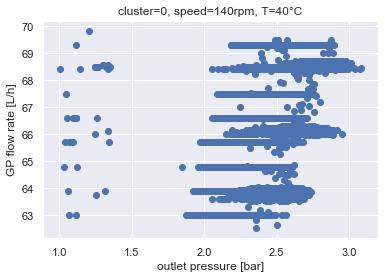

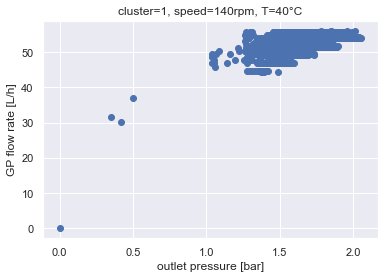

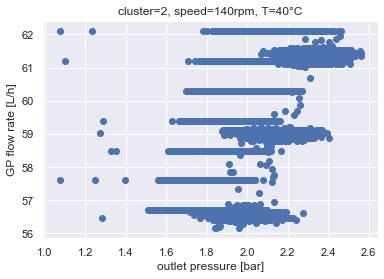

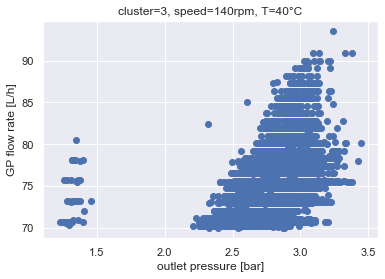

In [111]:
df1['cluster'] = kmeans.labels_
for i in range(k):
    plt.scatter(df1.query("cluster == " + str(i)).picco_pressione_velocita_1, df1.query("cluster == " + str(i)).picco_portata_velocita_1)
    plt.title("cluster=" + str(i) + ", speed=140rpm, T=40°C")
    plt.xlabel("outlet pressure [bar]")
    plt.ylabel("GP flow rate [L/h]")
    plt.show()

**VALUTO LEAKAGE COEFFICIENT MEDIANTE LINEAR REGRESSION**

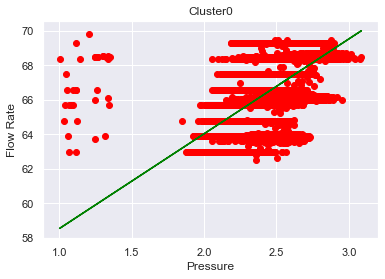

R^2 = 0.27924328382593
GP flow rate = 53.028834382527265
Leakage coefficient = 5.502876818697385


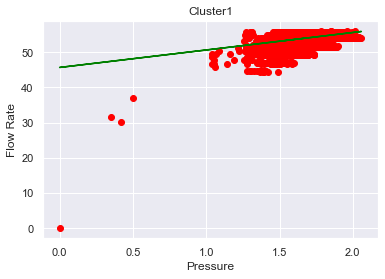

R^2 = 0.11209545512201669
GP flow rate = 45.68772670326557
Leakage coefficient = 4.963350716516934


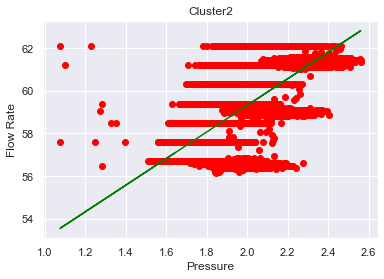

R^2 = 0.3125995065730732
GP flow rate = 46.84790708245087
Leakage coefficient = 6.234895997658858


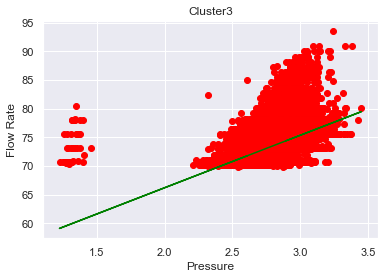

R^2 = 0.28679703062872
GP flow rate = 47.91328944803439
Leakage coefficient = 9.157788174744532


In [112]:
from sklearn.linear_model import LinearRegression
for i in range(k):
    X = np.array(df1.query("cluster == " + str(i)).picco_pressione_velocita_1).reshape(-1, 1)
    y = np.array(df1.query("cluster == " + str(i)).picco_portata_velocita_1).reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    plt.scatter(X, y, color = "red")
    plt.plot(X, reg.predict(X), color = "green")
    plt.title("Cluster" + str(i))
    plt.xlabel("Pressure")
    plt.ylabel("Flow Rate")
    plt.show()
    print("R^2 =", reg.score(X, y))
    print("GP flow rate =", reg.intercept_[0])
    print("Leakage coefficient =", reg.coef_[0][0])

**METODO ALTERNATIVO: IPOTIZZO EFFICIENZA DEL 90% PER RICAVARE PORTATA TEORICA E IL LEAKAGE COEFFICIENT**

In [113]:
df['Qt'] = df.picco_portata_velocita_1 / 0.9

In [114]:
df[['Qt', 'picco_portata_velocita_1', 'picco_pressione_velocita_1']].head()

,Qt,picco_portata_velocita_1,picco_pressione_velocita_1
0,57.2444,51.52,1.6746
1,62.7292,56.4562,2.02832
2,57.3281,51.5953,1.59596
3,60.0711,54.064,1.77749
4,62.7554,56.4799,2.06473


In [115]:
df2 = df.query("picco_pressione_velocita_1 > 0")
print(len(df2))
df2['alfa'] = (df2.Qt - df2.picco_portata_velocita_1) / (df2.picco_pressione_velocita_1)

295744


In [116]:
df2[['Qt', 'picco_portata_velocita_1', 'picco_pressione_velocita_1', 'alfa']].head()

,Qt,picco_portata_velocita_1,picco_pressione_velocita_1,alfa
0,57.2444,51.52,1.6746,3.41839
1,62.7292,56.4562,2.02832,3.09267
2,57.3281,51.5953,1.59596,3.59208
3,60.0711,54.064,1.77749,3.37954
4,62.7554,56.4799,2.06473,3.03939
